In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import time
import os
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
def retrieve_stock_data(stock_list, s_date, e_date):
    i = 0
    stock_data = {}
    for stock in stock_list:
        data = web.DataReader(stock, 'yahoo', s_date, e_date)
        stock_data[stock] = data
        filename = stock + '.csv'
        data.to_csv(filename)
        i += 1
    return stock_data

In [4]:
stock_list = ['WMT', 'TGT', 'JCP', 'KSS', 'HD', 'BBY', 'COST', 'AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB',
              'JPM', 'BAC', 'HSBC', 'C', 'GS', 'GM', 'F', 'TM', 'TSLA', 'HMC']

In [5]:
dir_name = 'Stock_data'
if not os.path.isfile(dir_name):
    try:
        os.mkdir(dir_name)
    except FileExistsError:
        print("Can't create " + dir_name + "!\t")
        print("A same name folder may exist\n")

os.chdir(dir_name)
stock_data = retrieve_stock_data(stock_list, '10/01/2006', '11/04/2019')
os.chdir('..')
print("\nData retrival is complete. Check your directory**" + dir_name + "**to find your data!\n")


Data retrival is complete. Check your directory**Stock_data**to find your data!



In [90]:
years_list = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
              '2017', '2018', '2019']
for stock in stock_list:
    stock_data[stock]['PofPriceChange'] = (stock_data[stock]['Close'] - stock_data[stock]['Open']) / \
                                          stock_data[stock]['Open']
stock_up = {}
for stock in stock_list:
    stock_up[stock] = {}
    for year in years_list:
        if year in stock_data[stock].index:
            stock_up[stock][year] = np.sum(stock_data[stock]['PofPriceChange'][year] >= 0.02)
        else:
            stock_up[stock][year] = None

stock_up_matrix = np.zeros([len(stock_list), len(years_list)])
for i in range(len(stock_list)):
    for j in range(len(years_list)):
        stock_up_matrix[i,j] = stock_up[stock_list[i]][years_list[j]]
stock_up_df = pd.DataFrame(data=stock_up_matrix, index=stock_list, columns=years_list)

stock_down = {}
for stock in stock_list:
    stock_down[stock] = {}
    for year in years_list:
        if year in stock_data[stock].index:
            stock_down[stock][year] = np.sum(stock_data[stock]['PofPriceChange'][year] <= 0.02)
        else:
            stock_down[stock][year] = None

stock_down_matrix = np.zeros([len(stock_list), len(years_list)])
for i in range(len(stock_list)):
    for j in range(len(years_list)):
        stock_down_matrix[i,j] = stock_down[stock_list[i]][years_list[j]]
stock_down_df = pd.DataFrame(data=stock_up_matrix, index=stock_list, columns=years_list)

from IPython.display import display, HTML

print('\nDays of stock went up 2%\n')
display(stock_up_df)
print('\nDays of stock went down 2%\n')
display(stock_down_df)


Days of stock went up 2%



,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
WMT,4.0,8.0,28.0,15.0,1.0,6.0,2.0,1.0,1.0,2.0,6.0,2.0,10.0,2.0
TGT,6.0,20.0,64.0,41.0,11.0,10.0,4.0,5.0,7.0,3.0,8.0,16.0,17.0,12.0
JCP,5.0,23.0,73.0,60.0,41.0,38.0,46.0,52.0,53.0,49.0,51.0,53.0,62.0,52.0
KSS,9.0,20.0,68.0,46.0,20.0,21.0,16.0,14.0,9.0,23.0,35.0,34.0,36.0,21.0
HD,3.0,16.0,63.0,25.0,15.0,21.0,11.0,7.0,4.0,8.0,8.0,2.0,12.0,4.0
BBY,5.0,10.0,50.0,43.0,22.0,29.0,39.0,48.0,34.0,20.0,33.0,20.0,29.0,15.0
COST,5.0,13.0,46.0,29.0,6.0,8.0,5.0,4.0,1.0,6.0,7.0,3.0,13.0,3.0
AAPL,4.0,29.0,57.0,34.0,21.0,18.0,16.0,13.0,8.0,19.0,10.0,4.0,12.0,9.0
MSFT,3.0,11.0,41.0,26.0,9.0,11.0,10.0,11.0,9.0,13.0,5.0,0.0,15.0,5.0
AMZN,8.0,38.0,67.0,52.0,36.0,29.0,21.0,15.0,20.0,20.0,14.0,4.0,26.0,12.0



Days of stock went down 2%



,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
WMT,4.0,8.0,28.0,15.0,1.0,6.0,2.0,1.0,1.0,2.0,6.0,2.0,10.0,2.0
TGT,6.0,20.0,64.0,41.0,11.0,10.0,4.0,5.0,7.0,3.0,8.0,16.0,17.0,12.0
JCP,5.0,23.0,73.0,60.0,41.0,38.0,46.0,52.0,53.0,49.0,51.0,53.0,62.0,52.0
KSS,9.0,20.0,68.0,46.0,20.0,21.0,16.0,14.0,9.0,23.0,35.0,34.0,36.0,21.0
HD,3.0,16.0,63.0,25.0,15.0,21.0,11.0,7.0,4.0,8.0,8.0,2.0,12.0,4.0
BBY,5.0,10.0,50.0,43.0,22.0,29.0,39.0,48.0,34.0,20.0,33.0,20.0,29.0,15.0
COST,5.0,13.0,46.0,29.0,6.0,8.0,5.0,4.0,1.0,6.0,7.0,3.0,13.0,3.0
AAPL,4.0,29.0,57.0,34.0,21.0,18.0,16.0,13.0,8.0,19.0,10.0,4.0,12.0,9.0
MSFT,3.0,11.0,41.0,26.0,9.0,11.0,10.0,11.0,9.0,13.0,5.0,0.0,15.0,5.0
AMZN,8.0,38.0,67.0,52.0,36.0,29.0,21.0,15.0,20.0,20.0,14.0,4.0,26.0,12.0


In [7]:
Retail_stock_list = stock_list[0:7]
IT_stock_list = stock_list[7:12]
Bank_stock_list = stock_list[12:17]
Auto_stock_list = stock_list[17:]

In [97]:
for stock in stock_list:
    stock_data[stock]['Log return'] = np.log(stock_data[stock]['Close']) - np.log(stock_data[stock]['Close'].shift(1))

In [105]:
def get_status(status):
    dic = {}
    for stock in stock_list:
        dic[stock] = {}
        for year in years_list:
            if year in stock_data[stock].index:
                dic[stock][year] = np.around(status(stock_data[stock]['Log return'][year]), decimals=4)
            else:
                dic[stock][year] = None
    dic_matrix = np.zeros([len(stock_list), len(years_list)])
    for i in range(len(stock_list)):
        for j in range(len(years_list)):
            dic_matrix[i,j] = dic[stock_list[i]][years_list[j]]
    dic_df = pd.DataFrame(data=dic_matrix, index=stock_list, columns=years_list)
    return dic_df

stock_min_df = get_status(np.min)
stock_max_df = get_status(np.max)
stock_mean_df = get_status(np.mean)
stock_median_df = get_status(np.median)
print('\nChecking stock log return min status\n')
display(stock_min_df)
print('\nChecking stock log return max status\n')
display(stock_max_df)
print('\nChecking stock log return mean status\n')
display(stock_mean_df)
print('\nChecking stock log return median status\n')
display(stock_median_df)


Checking stock log return min status



,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
WMT,-0.0273,-0.0522,-0.0841,-0.0779,-0.0334,-0.0486,-0.0477,-0.0264,-0.0363,-0.1058,-0.0352,-0.0476,-0.1074,-0.0333
TGT,-0.0253,-0.0789,-0.1335,-0.0731,-0.0375,-0.0705,-0.0303,-0.0410,-0.0450,-0.0556,-0.0793,-0.1297,-0.1195,-0.0582
JCP,-0.0288,-0.0721,-0.1515,-0.1030,-0.0860,-0.1020,-0.2196,-0.1859,-0.1152,-0.1667,-0.0780,-0.1810,-0.3143,-0.1823
KSS,-0.0466,-0.0616,-0.1158,-0.0635,-0.0602,-0.0902,-0.1277,-0.0843,-0.0687,-0.1424,-0.2082,-0.2110,-0.0968,-0.1316
HD,-0.0267,-0.0546,-0.0858,-0.0622,-0.0444,-0.0607,-0.0365,-0.0315,-0.0303,-0.0370,-0.0489,-0.0418,-0.0576,-0.0346
BBY,-0.0498,-0.0608,-0.1210,-0.0884,-0.1604,-0.1680,-0.1585,-0.1162,-0.3367,-0.1515,-0.1017,-0.1270,-0.0772,-0.1142
COST,-0.0225,-0.0433,-0.1267,-0.0705,-0.0394,-0.0831,-0.0732,-0.0242,-0.0279,-0.0557,-0.0370,-0.0746,-0.0898,-0.0298
AAPL,-0.0316,-0.0728,-0.1975,-0.0515,-0.0509,-0.0576,-0.0665,-0.1319,-0.0833,-0.0631,-0.0680,-0.0395,-0.0686,-0.1049
MSFT,-0.0114,-0.0422,-0.0913,-0.1246,-0.0420,-0.0555,-0.0409,-0.1210,-0.0405,-0.0971,-0.0744,-0.0385,-0.0559,-0.0375
AMZN,-0.0375,-0.1277,-0.1368,-0.0819,-0.0812,-0.1353,-0.0802,-0.0752,-0.1165,-0.0650,-0.0792,-0.0361,-0.0814,-0.0553



Checking stock log return max status



,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
WMT,0.0380,0.0594,0.1050,0.0451,0.0278,0.0381,0.0412,0.0242,0.0461,0.0382,0.0915,0.1034,0.0892,0.0593
TGT,0.0292,0.0655,0.1638,0.0861,0.0427,0.0646,0.0340,0.0354,0.0713,0.0385,0.0623,0.0856,0.0562,0.1859
JCP,0.0319,0.0716,0.1517,0.1390,0.0876,0.1610,0.1724,0.1093,0.2258,0.1846,0.1373,0.1421,0.1086,0.2132
KSS,0.0378,0.0765,0.1380,0.0970,0.0521,0.0744,0.0607,0.0512,0.0339,0.0615,0.1499,0.0697,0.0976,0.1125
HD,0.0420,0.0450,0.1316,0.0996,0.0541,0.0526,0.0357,0.0554,0.0540,0.0437,0.0318,0.0245,0.0621,0.0430
BBY,0.0386,0.0635,0.1650,0.1267,0.0596,0.0672,0.1478,0.1517,0.0675,0.1184,0.1790,0.1946,0.0668,0.1320
COST,0.0737,0.0879,0.1021,0.0822,0.0481,0.0556,0.0610,0.0323,0.0384,0.0517,0.0481,0.0381,0.0445,0.0496
AAPL,0.0581,0.1002,0.1302,0.0654,0.0741,0.0572,0.0850,0.0501,0.0788,0.0558,0.0629,0.0592,0.0681,0.0661
MSFT,0.0244,0.0908,0.1706,0.1000,0.0515,0.0440,0.0550,0.0703,0.0387,0.0994,0.0566,0.0621,0.0730,0.0455
AMZN,0.1137,0.2386,0.1385,0.2374,0.0596,0.0863,0.1462,0.0897,0.0542,0.1322,0.0914,0.1241,0.0903,0.0489



Checking stock log return mean status



,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
WMT,-0.0008,0.0001,0.0007,-0.0002,0.0000,0.0004,0.0005,0.0006,0.0003,-0.0013,0.0005,0.0014,-0.0002,0.0011
TGT,0.0004,-0.0005,-0.0015,0.0013,0.0009,-0.0006,0.0006,0.0003,0.0007,-0.0002,-0.0000,-0.0004,0.0001,0.0024
JCP,0.0018,-0.0022,-0.0032,0.0012,0.0008,0.0003,-0.0023,-0.0030,-0.0014,0.0001,0.0009,-0.0039,-0.0044,0.0000
KSS,0.0007,-0.0016,-0.0009,0.0016,0.0000,-0.0004,-0.0006,0.0011,0.0003,-0.0010,0.0001,0.0004,0.0008,-0.0009
HD,0.0016,-0.0016,-0.0006,0.0009,0.0008,0.0007,0.0015,0.0011,0.0010,0.0009,0.0001,0.0014,-0.0004,0.0014
BBY,-0.0013,0.0003,-0.0025,0.0013,-0.0006,-0.0015,-0.0027,0.0048,-0.0001,-0.0010,0.0013,0.0019,-0.0010,0.0016
COST,0.0013,0.0011,-0.0011,0.0005,0.0008,0.0006,0.0007,0.0007,0.0007,0.0005,-0.0000,0.0006,0.0004,0.0018
AAPL,0.0020,0.0034,-0.0033,0.0036,0.0017,0.0009,0.0011,0.0002,0.0013,-0.0002,0.0004,0.0015,-0.0003,0.0023
MSFT,0.0014,0.0007,-0.0024,0.0018,-0.0003,-0.0003,0.0001,0.0013,0.0009,0.0007,0.0004,0.0013,0.0007,0.0016
AMZN,0.0040,0.0034,-0.0023,0.0038,0.0012,-0.0002,0.0015,0.0018,-0.0010,0.0031,0.0004,0.0018,0.0010,0.0009



Checking stock log return median status



,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
WMT,NaN,0.0000,0.0012,-0.0007,0.0004,0.0011,0.0009,0.0006,0.0001,-0.0010,0.0006,0.0011,-0.0001,0.0015
TGT,NaN,0.0008,-0.0034,0.0004,0.0002,-0.0008,0.0005,-0.0001,0.0009,0.0011,0.0007,0.0007,0.0012,0.0011
JCP,NaN,-0.0032,-0.0025,-0.0014,0.0000,0.0003,-0.0030,-0.0035,-0.0020,0.0000,-0.0005,0.0015,0.0000,0.0000
KSS,NaN,-0.0010,-0.0002,0.0009,-0.0010,-0.0010,-0.0001,0.0009,0.0007,-0.0004,0.0013,0.0018,0.0025,0.0006
HD,NaN,-0.0017,-0.0031,0.0002,0.0001,0.0010,0.0012,0.0010,0.0011,0.0008,0.0001,0.0012,-0.0001,0.0021
BBY,NaN,0.0000,-0.0017,0.0033,0.0002,-0.0006,-0.0021,0.0033,0.0018,-0.0005,0.0015,0.0027,0.0004,0.0018
COST,NaN,0.0005,0.0000,-0.0011,0.0002,0.0008,0.0002,0.0007,0.0002,0.0000,-0.0000,0.0008,0.0019,0.0026
AAPL,NaN,0.0026,-0.0010,0.0021,0.0023,0.0011,0.0005,-0.0003,0.0010,-0.0009,0.0008,0.0007,0.0005,0.0029
MSFT,NaN,0.0003,-0.0043,0.0017,0.0007,-0.0007,-0.0010,0.0009,0.0002,-0.0001,0.0004,0.0007,0.0023,0.0014
AMZN,NaN,0.0012,-0.0052,-0.0005,0.0005,0.0011,-0.0001,0.0010,0.0006,0.0005,0.0008,0.0014,0.0021,0.0016


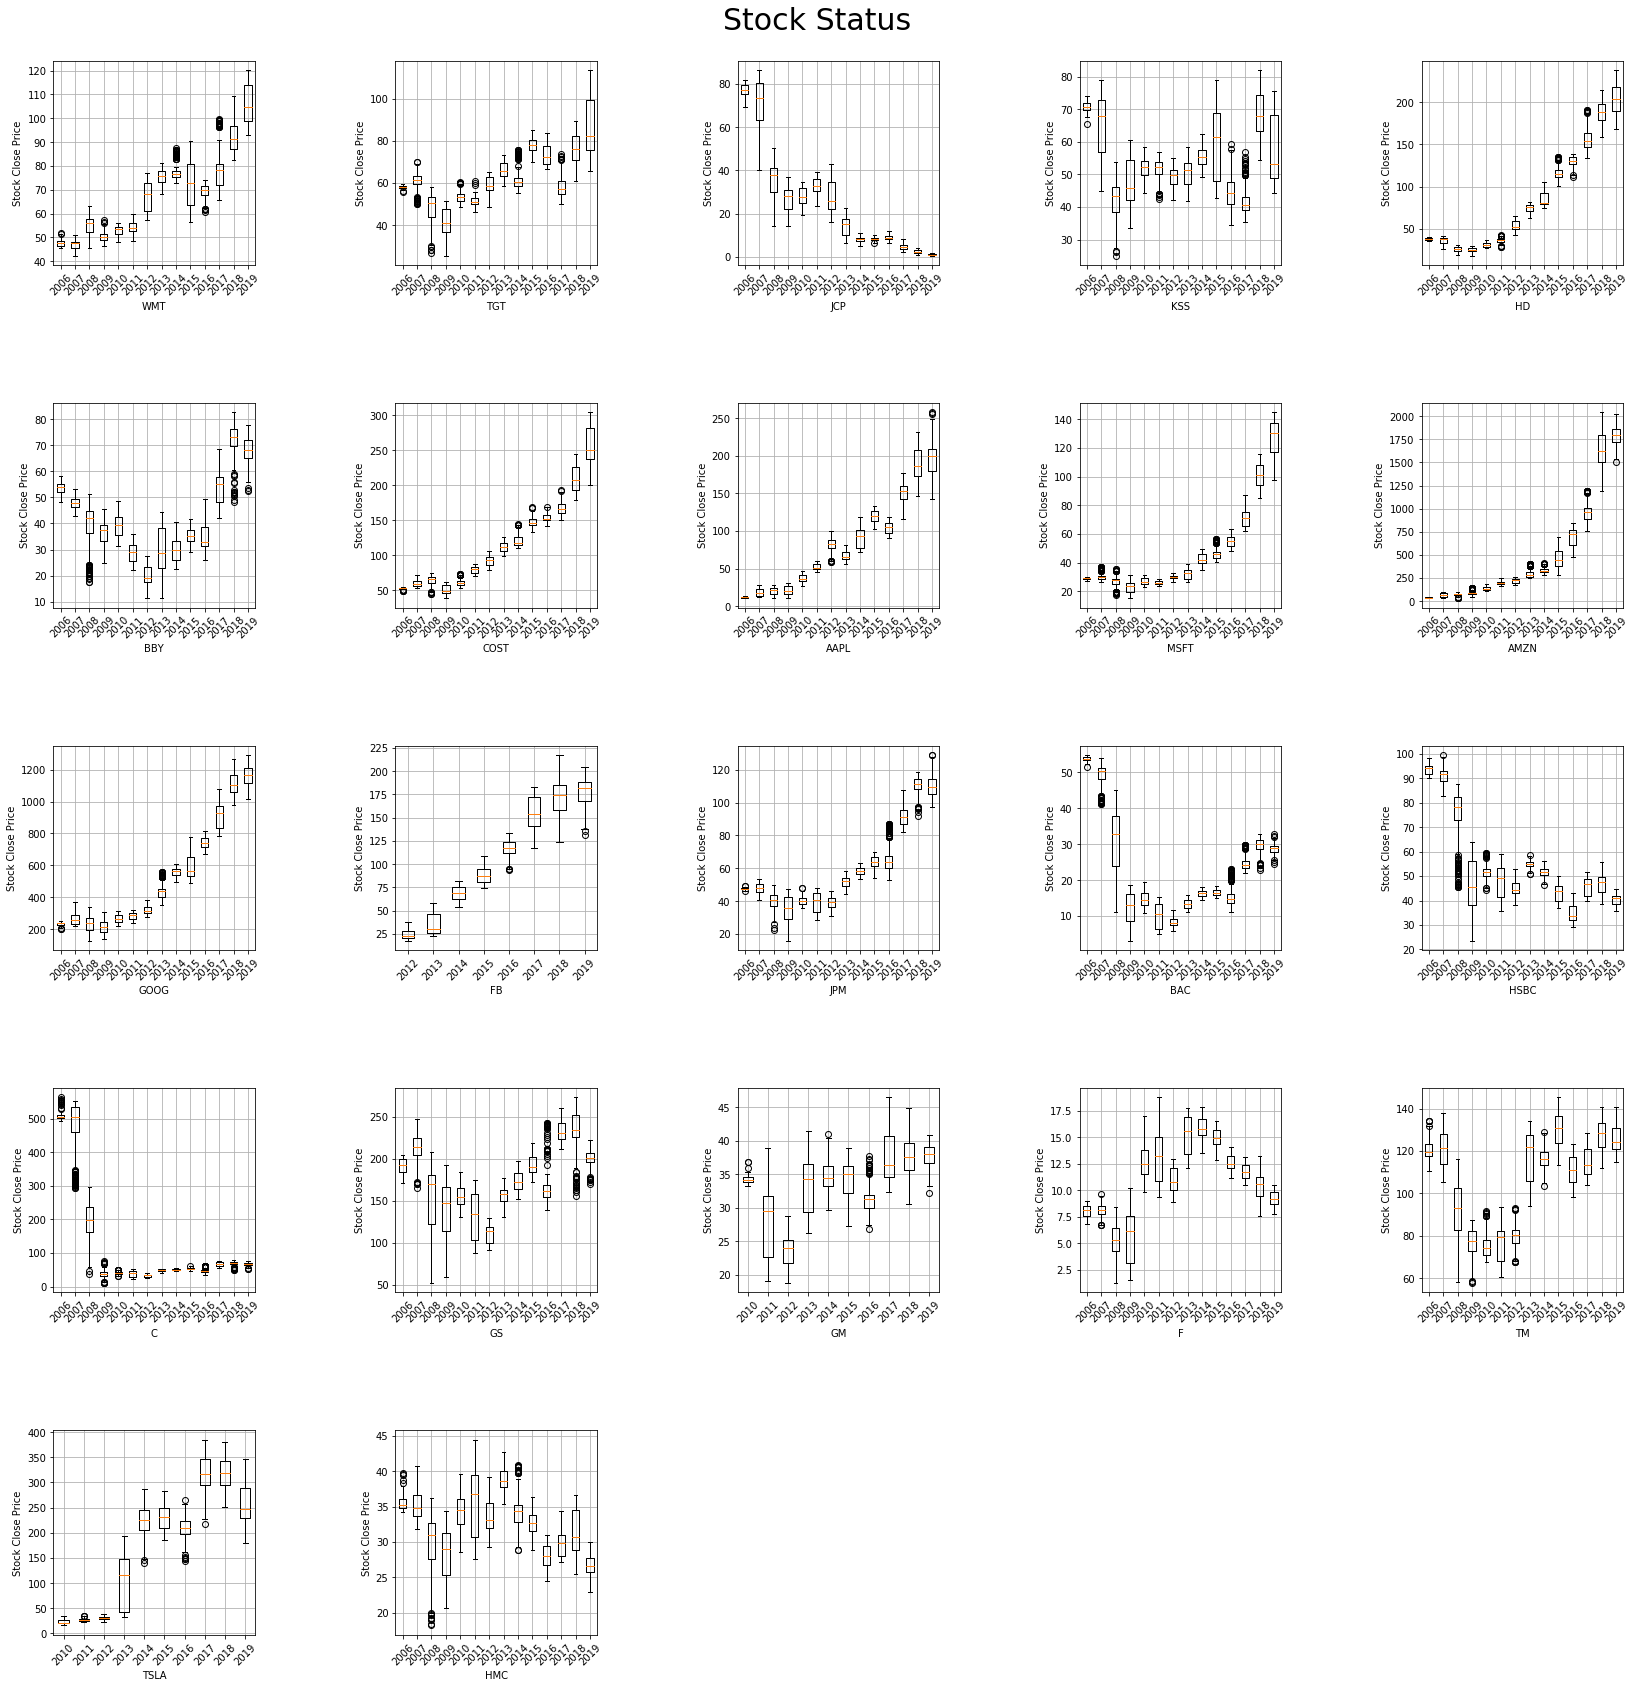

In [64]:
fig_stock_status = plt.figure(figsize=(25,25))
i = 1
for stock in stock_list:
    df = []
    labels = []
    group = stock_data[stock].index.year.unique()
    for x in group:
        a = stock_data[stock].Close[stock_data[stock].index.year == x]
        df.append(a)
        labels.append(x)
    plt.subplot(5,5,i)
    plt.boxplot(df, labels=labels)
    plt.xlabel(stock)
    plt.ylabel('Stock Close Price')
    plt.grid('on')
    plt.xticks(rotation=45)
    i += 1
fig_stock_status.suptitle('Stock Status', fontsize = 30)
plt.tight_layout(pad=9)
plt.show()

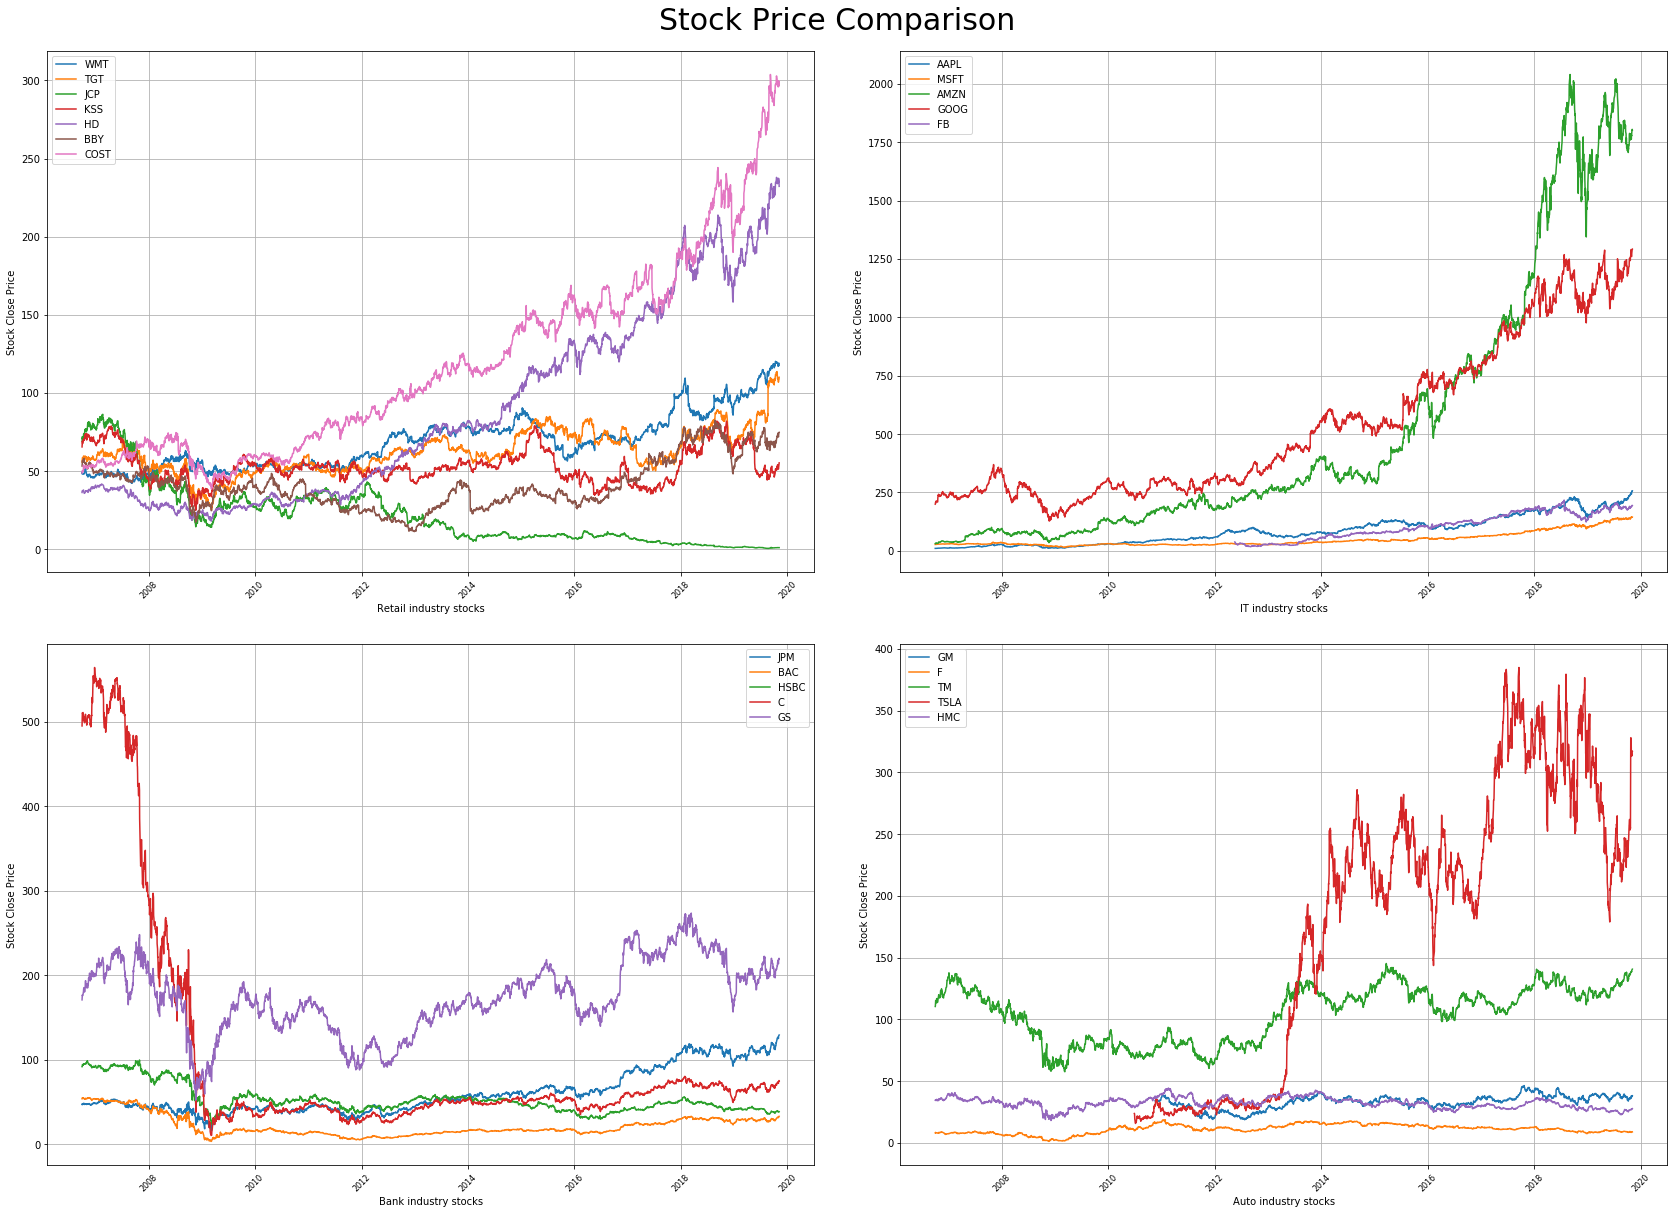

In [62]:
def plot_stock(list, df_column, xlabel, ylabel, legendloc):
    for i in range(len(list)):
        plt.plot(stock_data[list[i]][df_column], label=list[i], lw=1.5)
        plt.setp(plt.gca().get_xticklabels(), FontSize=8, rotation=45)
        plt.legend(loc=legendloc)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid('on')

        
fig_stock_price = plt.figure(figsize=(25,18))
plt.subplot(221)
plot_stock(Retail_stock_list, 'Close', 'Retail industry stocks', 'Stock Close Price', 'upper left')
plt.subplot(222)
plot_stock(IT_stock_list, 'Close', 'IT industry stocks', 'Stock Close Price', 'upper left')
plt.subplot(223)
plot_stock(Bank_stock_list, 'Close', 'Bank industry stocks', 'Stock Close Price', 'upper right')
plt.subplot(224)
plot_stock(Auto_stock_list, 'Close', 'Auto industry stocks', 'Stock Close Price', 'upper left')
fig_stock_price.suptitle('Stock Price Comparison', fontsize = 30)
plt.tight_layout(pad=7, w_pad=4.0, h_pad=3.0)
plt.show()

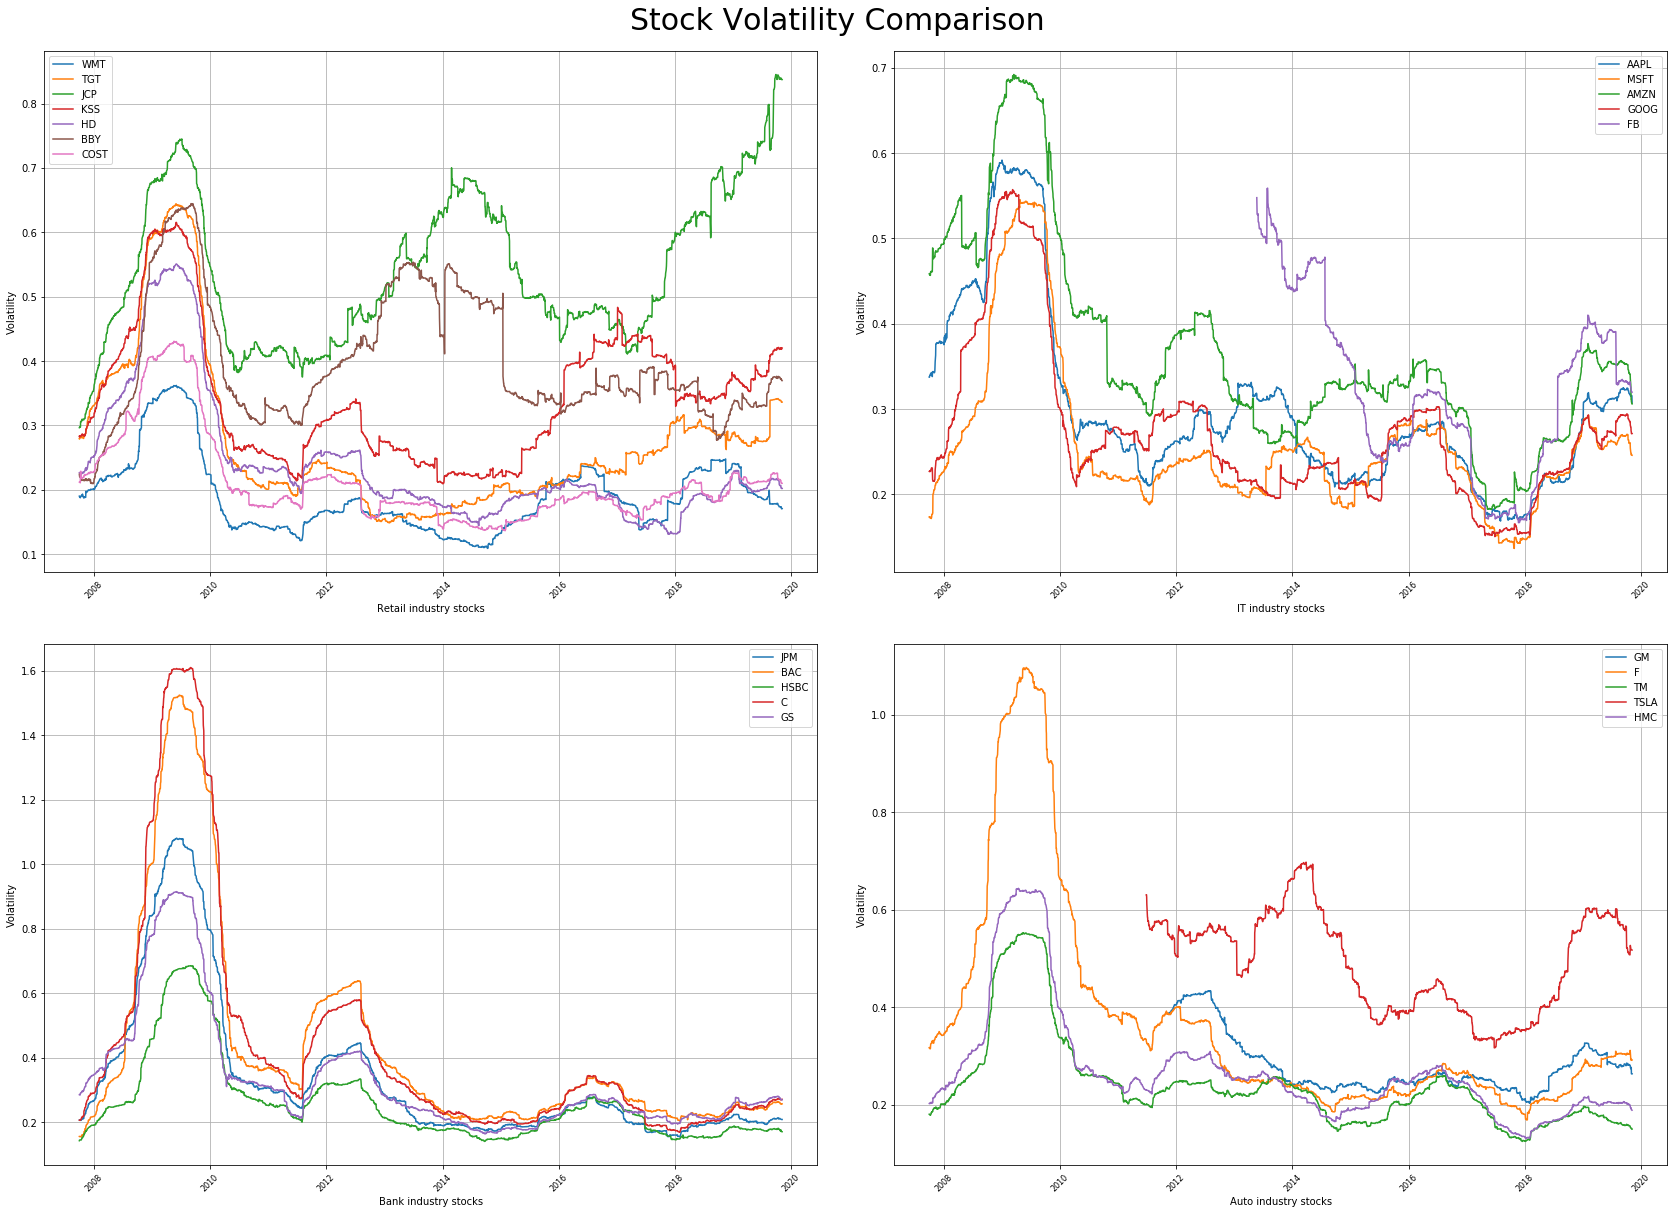

In [63]:
def compute_volatility(df, window_size):
    s_i = df
    s_i_minus_1 = df.shift(1)
    U_sequence = np.log(s_i / s_i_minus_1)
    ans = U_sequence.rolling(window = window_size, center = False).std() * np.sqrt(window_size)
    return ans


for stock in stock_list:
    stock_data[stock]['Volatility'] = compute_volatility(stock_data[stock]['Close'], 252)

fig_stock_volatility = plt.figure(figsize=(25,18))
plt.subplot(221)
plot_stock(Retail_stock_list, 'Volatility', 'Retail industry stocks', 'Volatility', 'upper left')
plt.subplot(222)
plot_stock(IT_stock_list, 'Volatility', 'IT industry stocks', 'Volatility', 'upper right')
plt.subplot(223)
plot_stock(Bank_stock_list, 'Volatility', 'Bank industry stocks', 'Volatility', 'upper right')
plt.subplot(224)
plot_stock(Auto_stock_list, 'Volatility', 'Auto industry stocks', 'Volatility', 'upper right')
fig_stock_volatility.suptitle('Stock Volatility Comparison', fontsize = 30)
plt.tight_layout(pad=7, w_pad=4.0, h_pad=3.0)
plt.show()

# Volatility
1. All stock in end of 2009 had high volatility, which mean they were more risky in that periord, especially bank industry.
2. In retail industry, JCP is very risky right now. Other stocks are performing well.
3. In IT industry, FB had very high volatility at begaining, then it drop to industry average.
4. In bank industry, all stocks are decrecing from 2013.
5. In Auto industy, TSLA is a outlier of those five stocks. It keeps high volatility all the time.

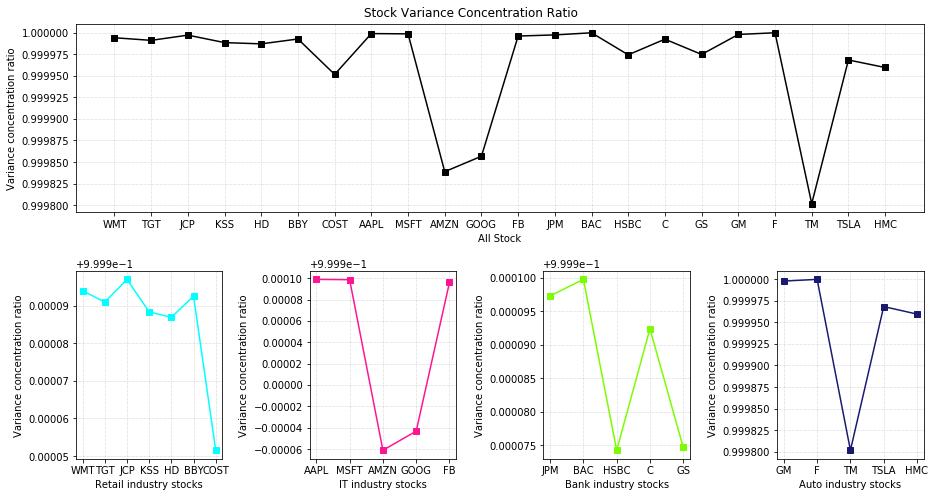

In [12]:
def compute_VCR(df):
    s = np.linalg.svd(df, compute_uv=False)
    rate = s[0]/np.sum(s)
    return rate


VCR = {}
for stock in stock_list:
    df = stock_data[stock].iloc[:, 2:7]
    VCR[stock] = compute_VCR(df)

def plot_VCR(s, e, color, xlabel):
    keys = list(VCR.keys())
    vals = list(VCR.values())
    plt.plot(keys[s:e], vals[s:e], color, lw=1.5, marker='s')
    plt.xlabel(xlabel)
    plt.ylabel('Variance concentration ratio')
    plt.grid(True, alpha=0.7, linestyle=':', linewidth=0.5, color='#808080')


fig_VCR = plt.figure(figsize=(13, 7))

plt.subplot(211)
plot_VCR(0, 23, '#000000', 'All Stock')
plt.subplot(245)
plot_VCR(0, 7, '#00FFFF', 'Retail industry stocks')
plt.subplot(246)
plot_VCR(7, 12, '#FF1493', 'IT industry stocks')
plt.subplot(247)
plot_VCR(12, 17, '#7CFC00', 'Bank industry stocks')
plt.subplot(248)
plot_VCR(17, 23, '#191970', 'Auto industry stocks')
fig_VCR.suptitle('Stock Variance Concentration Ratio')
fig_VCR.subplots_adjust(top=0.6)
plt.tight_layout()
plt.show()

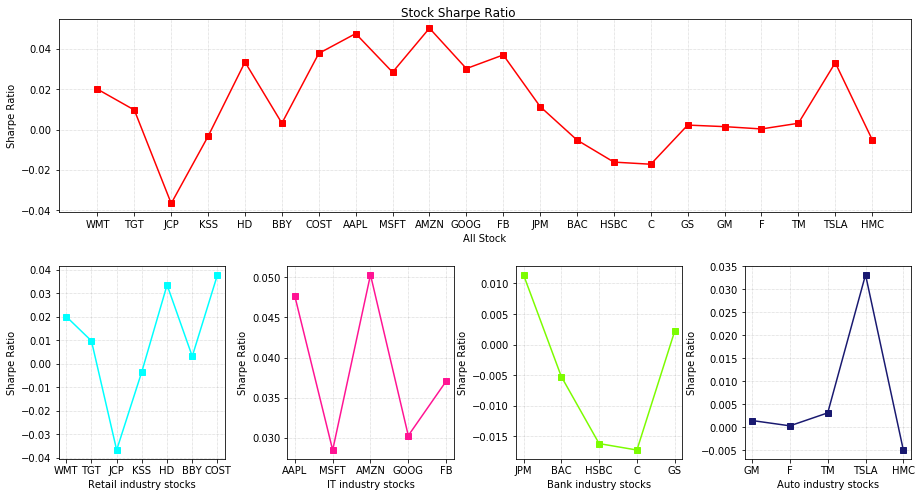

In [99]:
S_ratio = {}
for stock in stock_list:
    S_ratio[stock] = ((stock_data[stock]['Log return']*252*5*100).mean()-3)/(stock_data[stock]['Log return']*252*5*100).std()

    
def plot_s_ratio(start, end, color, xlabel):
    keys = list(S_ratio.keys())
    vals = list(S_ratio.values())
    plt.plot(keys[start:end], vals[start:end], color, lw=1.5, marker='s')
    plt.xlabel(xlabel)
    plt.ylabel('Sharpe Ratio')
    plt.grid(True, alpha=0.7, linestyle=':', linewidth=0.5, color='#808080')


fig_S_ratio = plt.figure(figsize=(13, 7))

plt.subplot(211)
plot_s_ratio(0, 23, 'r', 'All Stock')
plt.subplot(245)
plot_s_ratio(0, 7, '#00FFFF', 'Retail industry stocks')
plt.subplot(246)
plot_s_ratio(7, 12, '#FF1493', 'IT industry stocks')
plt.subplot(247)
plot_s_ratio(12, 17, '#7CFC00', 'Bank industry stocks')
plt.subplot(248)
plot_s_ratio(17, 23, '#191970', 'Auto industry stocks')
fig_S_ratio.suptitle('Stock Sharpe Ratio')
fig_S_ratio.subplots_adjust(top=0.3)
plt.tight_layout()
plt.show()

In [104]:
def compute_distribution(df):
    s = np.linalg.svd(df, compute_uv=False)
    rate = s/np.sum(s)
    return rate

def relative_entropy(p,q):
    if not(p.shape == q.shape):
        print("\n Error: dimension must be aligned for two vectors\n")
        quit()
    p_over_q = np.zeros(len(p))
    with np.errstate(divide='ignore'):
        p_over_q = p/q
    t = np.log2(p_over_q)
    t[np.isnan(t)] = 0.0
    t[np.isinf(t)] = 0.0
    ans = np.inner(p,t)
    return ans

p_distribution = {}
for stock in stock_list:
    df = stock_data[stock].iloc[:, 2:7]
    p_distribution[stock] = compute_distribution(df)
    
relative_entropy_matrix = np.zeros([len(p_distribution),len(p_distribution)])
for i in range(len(stock_list)):
    for j in range(len(stock_list)):
        relative_entropy_matrix[i,j] = relative_entropy(p_distribution[stock_list[i]], p_distribution[stock_list[j]])
relative_entropy_df = pd.DataFrame(data=relative_entropy_matrix, index= stock_list, columns= stock_list)
print('\nChecking Relative Entropy\n')
display(relative_entropy_df)


Checking Relative Entropy



,WMT,TGT,JCP,KSS,HD,BBY,COST,AAPL,MSFT,AMZN,...,JPM,BAC,HSBC,C,GS,GM,F,TM,TSLA,HMC
WMT,0.000000,0.000001,0.000002,0.000002,0.000004,0.000000,0.000043,0.000007,0.000006,0.000196,...,0.000002,0.000020,0.000016,0.000001,0.000016,0.000003,0.000020,0.000247,0.000023,0.000033
TGT,0.000001,0.000000,0.000006,0.000000,0.000001,0.000000,0.000035,0.000016,0.000013,0.000184,...,0.000007,0.000035,0.000011,0.000001,0.000010,0.000009,0.000035,0.000233,0.000017,0.000026
JCP,0.000001,0.000004,0.000000,0.000007,0.000008,0.000003,0.000054,0.000001,0.000001,0.000212,...,0.000000,0.000007,0.000024,0.000003,0.000023,0.000000,0.000007,0.000264,0.000032,0.000043
KSS,0.000003,0.000001,0.000011,0.000000,0.000001,0.000001,0.000030,0.000025,0.000021,0.000175,...,0.000012,0.000050,0.000007,0.000003,0.000007,0.000015,0.000050,0.000222,0.000014,0.000021
HD,0.000005,0.000002,0.000013,0.000001,0.000000,0.000003,0.000026,0.000029,0.000025,0.000167,...,0.000015,0.000058,0.000007,0.000002,0.000005,0.000018,0.000059,0.000216,0.000011,0.000019
BBY,0.000000,0.000000,0.000004,0.000001,0.000002,0.000000,0.000039,0.000011,0.000009,0.000190,...,0.000004,0.000027,0.000013,0.000001,0.000013,0.000006,0.000027,0.000240,0.000020,0.000030
COST,0.000085,0.000061,0.000130,0.000048,0.000041,0.000073,0.000000,0.000194,0.000177,0.000082,...,0.000136,0.000305,0.000014,0.000072,0.000012,0.000151,0.000308,0.000118,0.000007,0.000002
AAPL,0.000004,0.000008,0.000001,0.000011,0.000013,0.000006,0.000062,0.000000,0.000000,0.000223,...,0.000001,0.000001,0.000030,0.000006,0.000030,0.000000,0.000001,0.000276,0.000039,0.000051
MSFT,0.000004,0.000007,0.000001,0.000010,0.000012,0.000005,0.000060,0.000000,0.000000,0.000221,...,0.000000,0.000002,0.000029,0.000005,0.000028,0.000000,0.000002,0.000274,0.000037,0.000049
AMZN,0.000549,0.000462,0.000706,0.000411,0.000373,0.000505,0.000121,0.000920,0.000866,0.000000,...,0.000729,0.001301,0.000251,0.000489,0.000238,0.000783,0.001311,0.000013,0.000192,0.000158
